In [27]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/pbhagwat/DEV/CohortAnalysis/Cohort-Analysis/Data/Telco-Customer-Churn.csv')

In [18]:
pd.set_option('display.max_columns', 100)

In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [107]:
max(df.tenure)

72

In [45]:
dummies = pd.get_dummies(
    df[[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn' ]]
)

In [46]:
dummies.head()

,SeniorCitizen,tenure,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,45,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


In [47]:
dummies = dummies[['gender_Female', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check','Churn_Yes']]

In [89]:
len(dummies[dummies['Churn_Yes']== 0])

5174

In [56]:
data = dummies.join(df[['MonthlyCharges', 'TotalCharges','tenure']])

In [57]:
data['TotalCharges'] = data[['TotalCharges']].replace([' '], '0')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [58]:
from lifelines import CoxPHFitter 
from sklearn.cross_validation import train_test_split

In [75]:
x_select = ['gender_Female', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check','MonthlyCharges', 'TotalCharges','tenure', 'Churn_Yes']

In [76]:
cph_train, cph_test = train_test_split(data[x_select], test_size=0.2)

In [77]:
cph = CoxPHFitter()
cph.fit(cph_train, 'tenure', 'Churn_Yes')

<lifelines.CoxPHFitter: fitted with 5634 total observations, 4144 right-censored observations>

In [78]:
cph.print_summary()

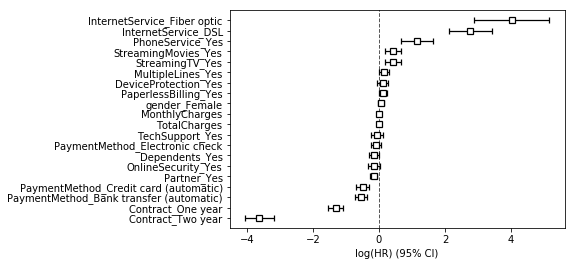

In [79]:
cph.plot()

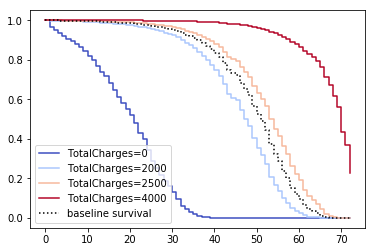

In [83]:
cph.plot_covariate_groups('TotalCharges', [0,2000,2500,4000], cmap='coolwarm')

#### Next step is to derive some insights and to make predictions of the existing customer behaviour 

In [86]:
# censored observation is one which is yet to have an ‘event’, i.e. customers who are yet to churn.
censored_subjects = data.loc[data['Churn_Yes']==0] 

In [87]:
# predict their survival curves. 
#'unconditioned' survival function 'cuz some of these curves will predict churn before the customer's current tenure time
# row index => tenure period column_index is the data index where Chrun_Yes=0
unconditioned_sf = cph.predict_survival_function(censored_subjects)

In [88]:
unconditioned_sf

,0,1,3,6,7,9,10,11,12,14,15,16,17,19,21,23,24,25,28,30,31,32,33,34,35,37,40,41,42,43,44,45,46,48,49,50,52,54,56,57,58,59,60,61,62,63,65,66,67,68,...,6975,6976,6977,6978,6979,6981,6982,6983,6984,6985,6987,6988,6989,6990,6992,6994,6995,6997,6998,7000,7002,7003,7004,7005,7007,7012,7013,7014,7015,7016,7017,7019,7020,7022,7023,7024,7025,7027,7028,7029,7030,7031,7033,7035,7036,7037,7038,7039,7040,7042
0.0,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000
1.0,9.695869e-01,9.985974e-01,0.999743,9.812474e-01,9.804980e-01,0.999954,9.690743e-01,0.999934,0.999982,9.878757e-01,1.000000,0.999628,1.000000,9.614158e-01,9.993423e-01,0.999993,0.999659,9.942557e-01,1.000000,1.000000,6.031201e-01,9.989158e-01,9.961385e-01,9.395241e-01,1.000000,9.989303e-01,9.894414e-01,0.999999,9.992662e-01,0.999999,9.683800e-01,9.985775e-01,9.055330e-01,0.999995,0.999998,9.984229e-01,9.939119e-01,0.999983,0.999995,0.999997,0.999976,1.000000,9.994255e-01,0.999932,0.999996,9.962022e-01,8.210936e-01,0.999703,0.999851,0.999982,...,0.999802,0.999997,9.823166e-01,1.000000,9.713462e-01,9.274036e-01,0.999999,9.897171e-01,9.948732e-01,9.994524e-01,9.992115e-01,9.927491e-01,9.973901e-01,9.968672e-01,0.999999,0.999782,0.999998,9.872367e-01,8.711999e-01,0.999800,1.000000,9.935319e-01,9.985246e-01,0.999563,0.999999,0.999998,9.986912e-01,9.979773e-01,9.960490e-01,9.014836e-01,0.999978,0.999949,9.965478e-01,0.999998,0.999968,9.992448e-01,9.631478e-01,9.426043e-01,0.999998,9.417523e-01,9.923503e-01,0.999926,9.960162e-01,9.637694e-01,9.927727e-01,0.999987,9.973605e-01,0.999999,9.864435e-01,1.000000
2.0,9.559818e-01,9.979563e-01,0.999626,9.727850e-01,9.717023e-01,0.999932,9.552452e-01,0.999904,0.999974,9.823774e-01,1.000000,0.999457,1.000000,9.442619e-01,9.990415e-01,0.999990,0.999503,9.916384e-01,1.000000,1.000000,4.785523e-01,9.984202e-01,9.943767e-01,9.130870e-01,1.000000,9.984412e-01,9.846476e-01,0.999999,9.989306e-01,0.999998,9.542478e-01,9.979273e-01,8.653389e-01,0.999993,0.999997,9.977022e-01,9.911387e-01,0.999975,0.999993,0.999996,0.999965,1.000000,9.991627e-01,0.999900,0.999995,9.944693e-01,7.502806e-01,0.999567,0.999783,0.999973,...,0.999711,0.999996,9.743304e-01,0.999999,9.585111e-01,8.959688e-01,0.999999,9.850476e-01,9.925363e-01,9.992019e-01,9.988510e-01,9.894491e-01,9.961983e-01,9.954371e-01,0.999998,0.999683,0.999997,9.814514e-01,8.179358e-01,0.999708,1.000000,9.905865e-01,9.978503e-01,0.999364,0.999999,0.999998,9.980930e-01,9.970532e-01,9.942465e-01,8.597045e-01,0.999969,0.999926,9.949723e-01,0.999998,0.999953,9.988995e-01,9.467422e-01,9.174535e-01,0.999997,9.162450e-01,9.888698e-01,0.999892,9.941987e-01,9.476331e-01,9.894834e-01,0.999982,9.961552e-01,0.999998,9.803023e-01,1.000000
3.0,9.434286e-01,9.973570e-01,0.999516,9.649355e-01,9.635463e-01,0.999913,9.424883e-01,0.999875,0.999966,9.772621e-01,1.000000,0.999298,1.000000,9.284934e-01,9.987603e-01,0.999987,0.999357,9.891965e-01,1.000000,1.000000,3.854312e-01,9.979567

In [111]:
# We've to condition the prediction on the basis that the customers were still with us when the data was collected
# c.name => row number/index of the data where Chrun_Yes=0
# data.loc[c.name, 'tenure'] => tenure value of specific index(c.name) in original data
conditioned_sf = unconditioned_sf.apply(lambda c:(c/c.loc[data.loc[c.name, 'tenure']]).clip_upper(1))

In [112]:
conditioned_sf

,0,1,3,6,7,9,10,11,12,14,15,16,17,19,21,23,24,25,28,30,31,32,33,34,35,37,40,41,42,43,44,45,46,48,49,50,52,54,56,57,58,59,60,61,62,63,65,66,67,68,...,6975,6976,6977,6978,6979,6981,6982,6983,6984,6985,6987,6988,6989,6990,6992,6994,6995,6997,6998,7000,7002,7003,7004,7005,7007,7012,7013,7014,7015,7016,7017,7019,7020,7022,7023,7024,7025,7027,7028,7029,7030,7031,7033,7035,7036,7037,7038,7039,7040,7042
0.0,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.0,1.000000e+00,1.000000,1.0,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.0,1.000000e+00,1.000000
1.0,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.0,1.000000e+00,1.000000,1.0,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.0,1.000000e+00,1.000000
2.0,9.859681e-01,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.0,1.000000,1.000000e+00,1.000000e+00,9.982314e-01,9.718612e-01,1.0,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.0,1.000000e+00,1.000000,1.0,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000e+00,1.000000,9.867863e-01,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,9.536551e-01,1.000000,1.000000,1.000000e+00,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.0,1.000000e+00,1.000000
3.0,9.730212e-01,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.0,1.000000,8.054108e-01,1.000000e+00,9.965798e-01,9.462577e-01,1.0,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,9.584202e-01,1.000000,

In [116]:
import matplotlib.pyplot as plt

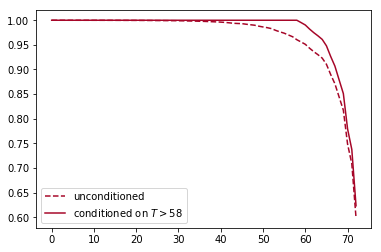

In [117]:
# investigate individual customers and see how the conditioning has affected their survival over the base line
subject = 12
unconditioned_sf[subject].plot(ls="--", color="#A60628", label="unconditioned") 
conditioned_sf[subject].plot(color="#A60628", label="conditioned on $T>58$") # T>58 indicate that the customer is active even after 
plt.legend()